#1. Data Exploration (EDA)
  a. Load the dataset and perform EDA

In [6]:
import pandas as pd

train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  



b. Examine features and summary statistics

In [7]:
print(train_df.info())
print(train_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             N


c. Visualizations

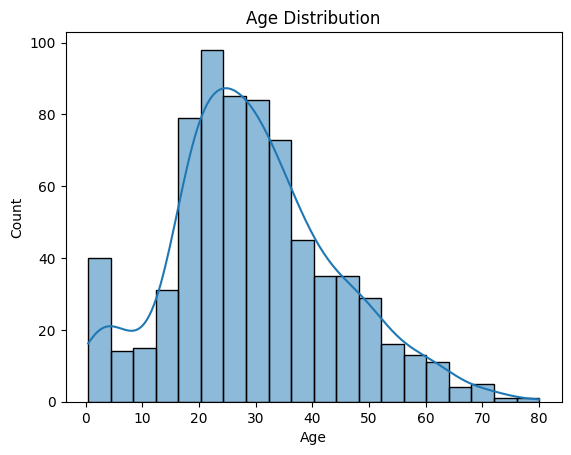

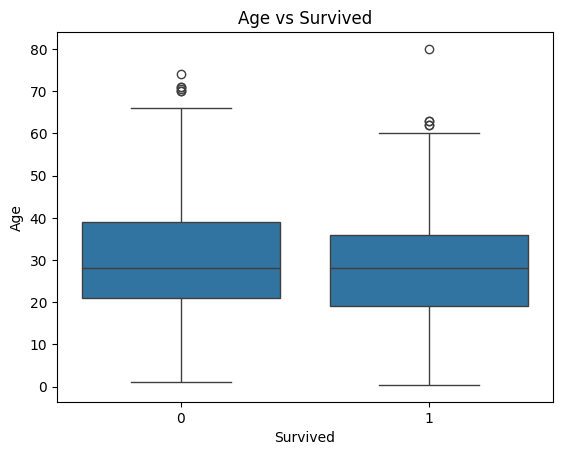

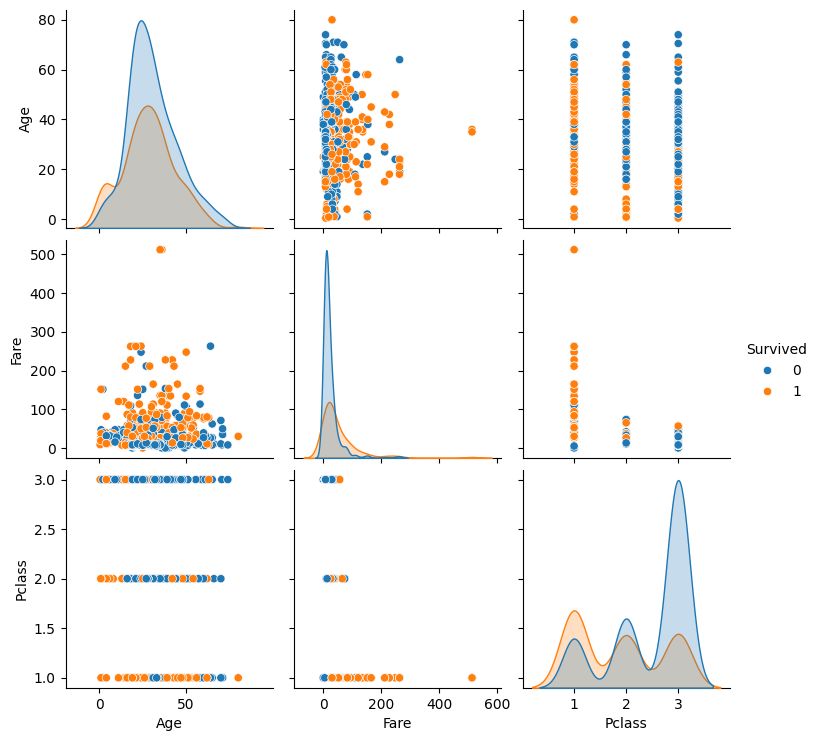

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Box plot of Age vs Survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survived")
plt.show()

# Pairplot of selected features
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()


#2. Data Preprocessing
a. Handle missing values

In [9]:
# Fill missing 'Age' with median, 'Embarked' with mode
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
train_df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-9-10552073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-9-10552073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=


b. Encode categorical variables

In [10]:
# Convert 'Sex' and 'Embarked' to numeric
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)


#3. Model Building
a. & b. Train a logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features and target
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

# Split for training and evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#4. Model Evaluation

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8826254826254826


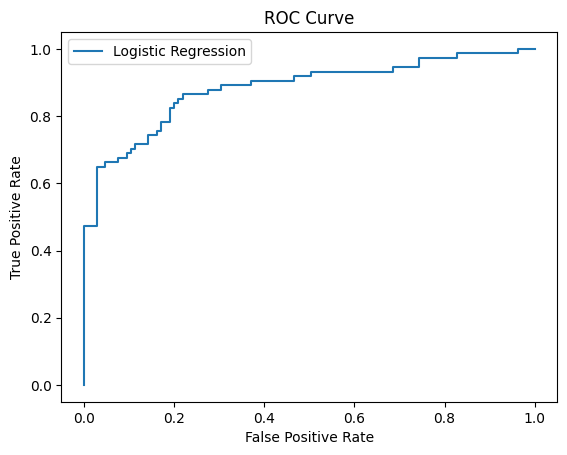

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#5. Interpretation

In [13]:
# Coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
4        Fare     0.002591
1         Age    -0.030537
3       Parch    -0.108108
6  Embarked_Q    -0.113105
2       SibSp    -0.295244
7  Embarked_S    -0.398065
0      Pclass    -0.936817
5    Sex_male    -2.591503


# 6: Deployment with Streamlit
app.py Sample

In [14]:
!pip install streamlit

In [15]:
# Save the trained model
import pickle
pickle.dump(model, open('logistic_model.pkl', 'wb'))

In [16]:
# Save the trained model
import pickle
pickle.dump(model, open('logistic_model.pkl', 'wb'))

# %% [markdown]
# # 6: Deployment with Streamlit
# app.py Sample
# %%
!pip install streamlit
# %%
import streamlit as st
import pickle
import numpy as np

# Load model
# The model is now saved in the previous step, so it can be loaded
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title('Titanic Survival Predictor')

pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 25)
sibsp = st.slider('Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Parents/Children Aboard', 0, 6, 0)
fare = st.number_input('Fare', 0.0, 600.0, 50.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])

# Encode categorical
sex_encoded = 1 if sex == 'male' else 0
# The encoding here needs to match the columns used during training
# The original training used one-hot encoding, not single integer encoding
# Need to create the same feature structure as X used for training
embarked_C = 1 if embarked == 'C' else 0
embarked_Q = 1 if embarked == 'Q' else 0
embarked_S = 1 if embarked == 'S' else 0


# Ensure the order and names of features match the training data X
# X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
# The Streamlit app provides: pclass, sex, age, sibsp, parch, fare, embarked (C, Q, S)
# Need to map these to the trained model's features: Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S

features = np.array([[pclass, age, sibsp, parch, fare, sex_encoded, embarked_Q, embarked_S]])

if st.button('Predict'):
    # Reshape features to match the expected input shape of the model if needed,
    # but with a single sample and multiple features, shape (1, n_features) is correct.
    # The critical part is that the feature columns must be in the same order as during training.
    result = model.predict(features)
    st.write("Survived!" if result[0] else "Did not survive.")

2025-07-03 06:14:53.180 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.347 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-03 06:14:53.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 06:14:53.354 Thread 'MainThread': mi

#Streamlit App

In [18]:
!pip install streamlit

In [22]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Model training function (can be moved to another script or run once)
def train_model():
    df = pd.read_csv("Titanic_train.csv")
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop(columns=['Cabin'], inplace=True)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
    X = df[features]
    y = df['Survived']
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Uncomment the first time to train the model
train_model()

# Load the trained model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title("🚢 Titanic Survival Prediction App")

st.write("Fill in the passenger details to predict survival.")

# Input fields
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Number of Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Number of Parents/Children Aboard", 0, 10, 0)
fare = st.slider("Fare", 0.0, 500.0, 50.0)
sex = st.selectbox("Sex", ["male", "female"])
embarked = st.selectbox("Port of Embarkation", ["S", "C", "Q"])

# Encoding
sex_male = 1 if sex == "male" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Predict
if st.button("Predict Survival"):
    input_data = np.array([[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]])
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]

    st.subheader("🎯 Prediction Result:")
    st.success("Survived ✅" if prediction == 1 else "Did not survive ❌")
    st.write(f"Survival Probability: **{prob*100:.2f}%**")

/tmp/ipython-input-22-875182850.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-22-875182850.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

#Save model with:

In [21]:
import pickle
pickle.dump(model, open('logistic_model.pkl', 'wb'))

#interview questions

Q1: Difference between Precision and Recall
Precision = True Positives / (True Positives + False Positives)
- Measures how many predicted positives are actually correct.

Recall = True Positives / (True Positives + False Negatives)
- Measures how well we capture all actual positives.

Example: In Titanic,

Precision tells us: Of all predicted survivors, how many really survived?

Recall tells us: Of all actual survivors, how many did we catch?

Q2: What is Cross-Validation and Why is it Important?

-Cross-validation is a technique to evaluate the model’s performance more reliably.

-The dataset is split into multiple folds (e.g., 5 or 10), and the model is trained/tested multiple times on different splits.

Why important?

-Reduces overfitting risk

-Gives better estimate of model performance on unseen data

